In [26]:
import os
import fiona
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create path to data directory, make sure it exists
data_dir = os.path.join(os.path.normpath(os.getcwd() + os.sep + os.pardir),"Data")
assert os.path.isdir

In [3]:
# Define paths to image file and shape files + make sure it exists
shpf = os.path.join(data_dir, "TriMet_BusRoutes_WGS84_UTM10N.shp")
assert os.path.isfile(shpf)

## Opening and Closing Files with Fiona

In [8]:
#two ways of opening a shapefile
with fiona.open(shpf,'r') as src:
    print(len(src))

print(src)  # File is closed when code block is complete

192
<closed Collection 'D:\Zach_Working\02_Scratch\PUG\HilliestBusRoute\Data\TriMet_BusRoutes_WGS84_UTM10N.shp:TriMet_BusRoutes_WGS84_UTM10N', mode 'r' at 0x563e160>


In [10]:
src = fiona.open(shpf, 'r')

print(len(src))
print(src) # File is still open

192
<open Collection 'D:\Zach_Working\02_Scratch\PUG\HilliestBusRoute\Data\TriMet_BusRoutes_WGS84_UTM10N.shp:TriMet_BusRoutes_WGS84_UTM10N', mode 'r' at 0x563f240>


In [13]:
# Close the file
src.close()
print(src)

<closed Collection 'D:\Zach_Working\02_Scratch\PUG\HilliestBusRoute\Data\TriMet_BusRoutes_WGS84_UTM10N.shp:TriMet_BusRoutes_WGS84_UTM10N', mode 'r' at 0x563f240>


## Reading Data

In [16]:
### Let us extract the below information from the shapefile
# 1. Number of features in dataset
# 2. Get points from the first feature
# 3. Plot the points

In [17]:
src = fiona.open(shpf, 'r') 
#"src" is referred to as a 'collection'

In [ ]:
### Multiple ways of accessing data
# 1. Using "next" on the collection ("src")
        # rec = next(iter(src))
        # rec['id']
        
# 2. Using src as a list, and indexing to find your desired record
        # rec = src[0]
        # rec['id']


In [46]:
# Lets pick an FID to work with
fid = 0
src[fid].keys()

dict_keys(['type', 'id', 'properties', 'geometry'])

In [53]:
src[fid]['type']

'Feature'

In [48]:
# the id key unlocks the fid of that record
src[fid]['id']

'0'

In [52]:
# the properties key unlocks an ordered dictionary, with keys being field names
# and values being the attributes for that record
src[fid]['properties']

OrderedDict([('rte', 190),
             ('dir', 1),
             ('rte_desc', 'MAX Yellow Line'),
             ('public_rte', None),
             ('dir_desc', 'To Portland City Center'),
             ('frequent', 'False'),
             ('type', 'MAX')])

In [56]:
# the geometry key unlocks a dictoinary that tells you the geometry type
# and a list of tuples representing the coordinates of the record

# src[fid]['geometry']

In [57]:
# Get the line coordinates, and convert them to an array to make plotting easier
points = src[0]['geometry']['coordinates']
point_list = np.array([list(pt) for pt in points])

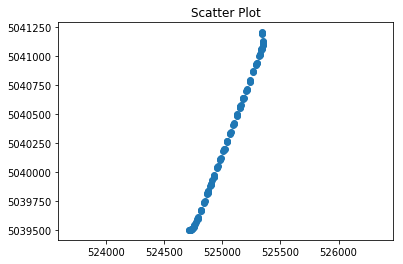

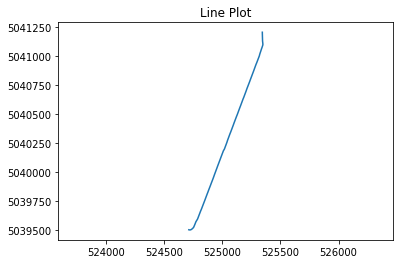

In [58]:
# Scatter Plot
plt.scatter(point_list[:,0],point_list[:,1])
plt.axis('equal')
plt.title('Scatter Plot')
plt.show()

# Line Plot
plt.plot(point_list[:,0],point_list[:,1])
plt.axis('equal')
plt.title('Line Plot')
plt.show()